In [96]:
import pandas as pd
import numpy as np
import os

# Data Engineering Project

## Purpose
1. Changing the table format so it can be processed
2. Plot the processed data
3. Use the processed data to make prediction
4. And time-series trend analysis

### 1. Changing the table format so it can be processed
### 2. Plot the processed data

In [168]:
datas = [os.path.join('data/beras', i) for i in os.listdir('data/beras/')]

def process_data_beras(file_path):

       df = pd.read_csv(file_path).transpose()
       df[1] = df[1].fillna(file_path[-8:-4])
       df.columns = df.loc['Kualitas Beras'].tolist()

       df = df.shift(-1)\
              .reset_index()\
              .rename(columns={file_path[-8:-4]:'Tahun',
                               df.columns[0]:'Bulan'})\
              .drop(columns=['index'])
       
       df.index = df[df.columns[2]]
       df.index = [i[1] for i in df.index]

       df = df.drop(columns=['Bulan'])\
              .reset_index()\
              .rename(columns={'index':'Bulan'})
       
       return df.head(df.shape[0] - 1)

df = process_data_beras(datas[0])

for i in datas[1:]:
    
    data_temp = process_data_beras(i)
    df = pd.concat([df,
                    data_temp],
                    axis=0,
                    ignore_index=True)

for i in df.columns[1:]:
      df[i] = df[i].astype(float)

df = df.interpolate(method='linear')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 11
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Bulan                  60 non-null     object 
 1   Tahun                  60 non-null     float64
 2   Premium                60 non-null     float64
 3   Medium                 60 non-null     float64
 4   Rendah/Luar Kualitas1  60 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.8+ KB


<Axes: xlabel='Tahun'>

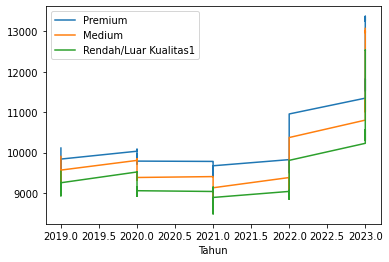

In [169]:
df.plot(kind='line',
        x='Tahun')

In [219]:
datas = [os.path.join('data/gula', i) for i in os.listdir('data/gula/')]

def process_data_gula(file_path):

    df = pd.read_csv(file_path)
    df.columns = df.loc[1]

    df = df.shift(-2)
    df.columns = ['Bulan'] + [i for i in df.columns[1:]]
    
    df = df.head(12)
    df = df.melt(id_vars=['Bulan'],
                 var_name='Tahun',
                 value_name='Harga')

    for i in df.columns[1:]:
        df[i] = df[i].astype(int)
    
    return df

df = process_data_gula(datas[0])

for i in datas[1:]:
    
    data_temp = process_data_gula(i)
    df = pd.concat([df,
                    data_temp],
                    axis=0,
                    ignore_index=True)

df = df.interpolate(method='linear')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Bulan   60 non-null     object
 1   Tahun   60 non-null     int32 
 2   Harga   60 non-null     int32 
dtypes: int32(2), object(1)
memory usage: 1.1+ KB


<Axes: xlabel='Tahun'>

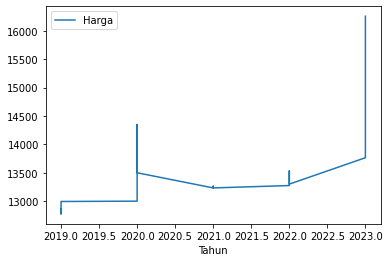

In [220]:
df.plot(kind='line',
        x='Tahun')

### 3. Use the processed data to make prediction
### 4. And time-series trend analysis

In [233]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

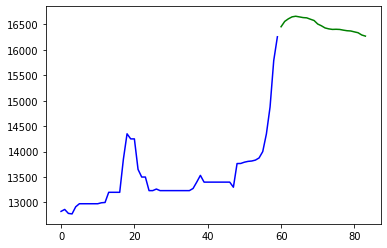

In [243]:
def predict_data(datas,
                 n_month):

    model = sm.tsa.statespace.SARIMAX(datas,
                                      order=(1, 1, 1),
                                      seasonal_order=(1, 0, 1, 12))
    model_fit = model.fit()

    forecast = model_fit.get_forecast(steps=n_month)
    forecast = pd.Series(forecast.predicted_mean)
    
    return forecast

forecast = predict_data(df['Harga'],
                        24)
plt.plot(df['Harga'], label='Actual Data', color='blue')
plt.plot(forecast, label='Forecast Data', color='green')